# EDA

This notebook will be going through an overview of the tweets that our team has collected. These tweets were downloaded from a Git repository hosted by the PanaceaLab at Georgia Tech University. They have already filtered these tweets to only those pertaining to the novel Coronavirus.

First let us load the tweets:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataset import Tweet_Dataset
import warnings
from datetime import datetime, timedelta #refactor
warnings.filterwarnings('ignore')

In [2]:
data_folder = '../../data/b07/'
config_path = '../../config/data_params.yaml'
data = Tweet_Dataset(config_path, data_folder)

We have created a Tweet_Dataset class to easily interact with the tweets. For example there are:

In [ ]:
print(len(data), 'tweets in the dataset')

## Top 10 Hashtags

One of the most important pieces of information contained in the tweets are the hashtags. Hashtags are a special kind of data because they serve as a sort of classification by themselves. Here, we look at the top 10 hashtags that were present in the dataset.

In [ ]:
tag_counts = data.hashtag_counts()

most_common_tags = tag_counts.most_common(10)

tag_labels = [elem[0] for elem in most_common_tags]
tag_values = [elem[1] for elem in most_common_tags]
indexes = np.arange(len(tag_labels))

In [ ]:
plt.bar(tag_labels, tag_values)
plt.xticks(indexes, tag_labels, rotation='vertical', fontsize=10)
plt.suptitle('Top 10 Hashtags')
plt.show()

## Most Posting Users

Now we shall do the same but for the number of times each user posts.

In [ ]:
usr_counts = data.user_name_counts()

most_common_users = usr_counts.most_common(10)

usr_labels = [elem[0] for elem in most_common_users]
usr_values = [elem[1] for elem in most_common_users]
indexes = np.arange(len(usr_labels))

In [ ]:
plt.bar(usr_labels, usr_values)
plt.xticks(indexes, usr_labels, rotation='vertical', fontsize=10)
plt.suptitle('Top 10 Most Posting Users')
plt.show()

Immediately we notice something interesting. The users who post the most frequently are bots. They seem to make up a large proportion of the Top 10 as well, with 40% of the top ten users containing the phrase 'bot' in their names. Of course, some of the other users may be bots as well, but just without the word 'bot' in their screen name. This definitely warrants further investigation.

## Hashtag Counts by Day

In this section we will select, by hand, 3 hashtags for the science set and 3 for the conspiracy set. Note that this was based off of our biased assumptions and could very well not be the case. We will investigate how the usage of these hashtags changed throughout the dataset's timespan.

In [3]:
daily_tag_occurrences = data.get_daily_tag_counts()

In [5]:
# 3 science
covid19 = daily_tag_occurrences['Covid19']
wearAMask = daily_tag_occurrences['WearAMask']
socialDistancing = daily_tag_occurrences['SocialDistancing']

# 3 misinformation
fakeNews = daily_tag_occurrences['FakeNews']
hoax = daily_tag_occurrences['Hoax']
chinaVirus = daily_tag_occurrences['ChinaVirus']

### Science Hashtag Usages

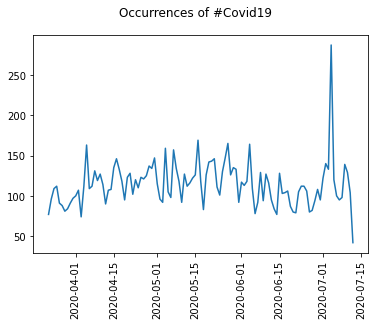

In [7]:
dates, frequencies = zip(*sorted(covid19.items()))
plt.xticks(rotation='vertical')
plt.suptitle('Occurrences of #Covid19')
plt.plot(dates,frequencies)

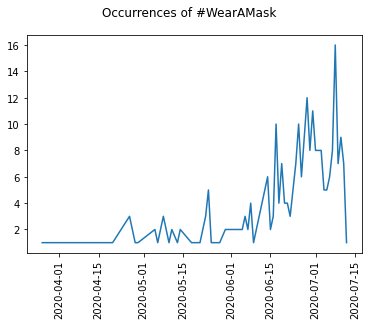

In [8]:
dates, frequencies = zip(*sorted(wearAMask.items()))
plt.xticks(rotation='vertical')
plt.suptitle('Occurrences of #WearAMask')
plt.plot(dates,frequencies)

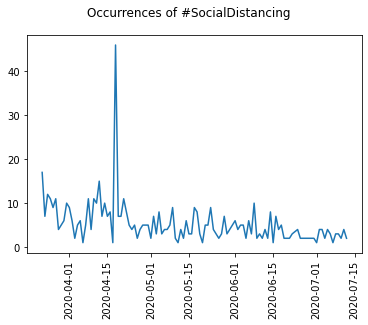

In [9]:
dates, frequencies = zip(*sorted(socialDistancing.items()))
plt.xticks(rotation='vertical')
plt.suptitle('Occurrences of #SocialDistancing')
plt.plot(dates,frequencies)

### Misinformation Hashtag Usages

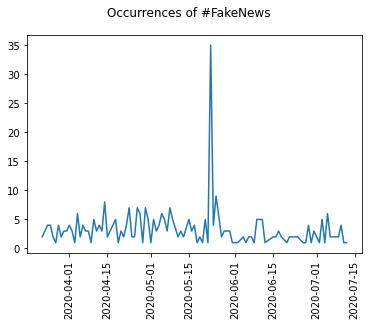

In [10]:
dates, frequencies = zip(*sorted(fakeNews.items()))
plt.xticks(rotation='vertical')
plt.suptitle('Occurrences of #FakeNews')
plt.plot(dates,frequencies)

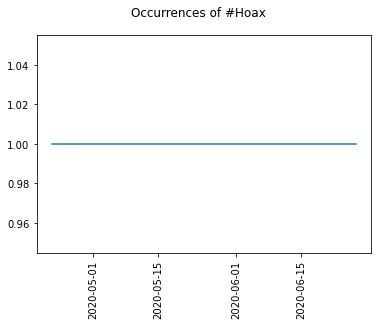

In [11]:
dates, frequencies = zip(*sorted(hoax.items()))
plt.xticks(rotation='vertical')
plt.suptitle('Occurrences of #Hoax')
plt.plot(dates,frequencies)

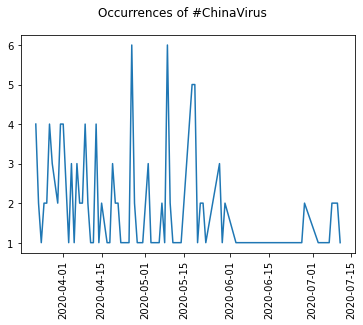

In [12]:
dates, frequencies = zip(*sorted(chinaVirus.items()))
plt.xticks(rotation='vertical')
plt.suptitle('Occurrences of #ChinaVirus')
plt.plot(dates,frequencies)